<a href="https://colab.research.google.com/github/Chayti/Forecasting-of-Covid-19-Trends-in-Bangladesh-Using-Machine-Learning-Techniques/blob/main/Covid_fb_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# //drive.mount('/content/drive')

In [ ]:
import os
import numpy as np
import pandas as pd
import sklearn

In [ ]:
df = pd.read_excel("Covid-19 dataset for Bangladesh.xlsx")
print(df.shape)
df.head(10)

(511, 7)


,Date,Testing sample per day,Detected per day,Total detected,Recovery per day,Death per day,Total Death
0,2020-03-08,4,3,3,0,0,0
1,2020-03-09,5,0,3,0,0,0
2,2020-03-10,127,0,3,0,0,0
3,2020-03-11,10,0,3,0,0,0
4,2020-03-12,21,0,3,0,0,0
5,2020-03-13,24,0,3,2,0,0
6,2020-03-14,24,0,3,0,0,0
7,2020-03-15,20,2,5,0,0,0
8,2020-03-16,10,3,8,0,0,0
9,2020-03-17,36,0,8,0,0,0


In [ ]:
df.isna().sum()

Date                      0
Testing sample per day    0
Detected per day          0
Total detected            0
Recovery per day          3
Death per day             0
Total Death               0
dtype: int64

In [ ]:
df['Recovery per day'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
506    False
507    False
508    False
509    False
510    False
Name: Recovery per day, Length: 511, dtype: bool

In [ ]:
missin_idx=df[df['Recovery per day'].isnull()].index.tolist()

In [ ]:
missin_idx

[29, 56, 99]

In [ ]:
for midx in missin_idx:
  df['Recovery per day'][midx] = np.mean(df['Recovery per day'][midx-4:midx+4])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.isna().sum()

Date                      0
Testing sample per day    0
Detected per day          0
Total detected            0
Recovery per day          0
Death per day             0
Total Death               0
dtype: int64

In [ ]:
 #df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    511 non-null    datetime64[ns]
 1   Testing sample per day  511 non-null    object        
 2   Detected per day        511 non-null    int64         
 3   Total detected          511 non-null    int64         
 4   Recovery per day        511 non-null    object        
 5   Death per day           511 non-null    int64         
 6   Total Death             511 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
 #df['Recovery per day'].dtypes

dtype('O')

In [ ]:
#df['Recovery per day']=df['Recovery per day'].astype(np.int64)

In [ ]:
#df['Recovery per day'].dtypes

dtype('int64')

In [ ]:
 df.describe()

,Detected per day,Total detected,Recovery per day,Death per day,Total Death
count,511.000000,5.110000e+02,511.00000,511.000000,511.000000
mean,2445.174168,4.340873e+05,2089.90411,40.479452,6532.344423
std,2698.896977,3.040967e+05,2207.29894,46.613293,4875.829044
min,0.000000,3.000000e+00,0.00000,0.000000,0.000000
25%,867.500000,1.884755e+05,666.50000,16.000000,2407.500000
50%,1687.000000,4.387950e+05,1648.00000,30.000000,6275.000000
75%,2887.500000,5.862635e+05,2526.00000,41.500000,8813.500000
max,16230.000000,1.249484e+06,14336.00000,258.000000,20685.000000


In [ ]:
df['Date']

0     2020-03-08
1     2020-03-09
2     2020-03-10
3     2020-03-11
4     2020-03-12
         ...    
506   2021-07-27
507   2021-07-28
508   2021-07-29
509   2021-07-30
510   2021-07-31
Name: Date, Length: 511, dtype: datetime64[ns]

In [ ]:
#from pandas import to_datetime
#df['Date']= to_datetime(df['Date'])
#df['Date']

In [ ]:
df_detected = df[["Date","Detected per day"]]
df_detected.columns = ['ds', 'y']
df_detected

,ds,y
0,2020-03-08,3
1,2020-03-09,0
2,2020-03-10,0
3,2020-03-11,0
4,2020-03-12,0
...,...,...
506,2021-07-27,14925
507,2021-07-28,16230
508,2021-07-29,15271
509,2021-07-30,13862


In [ ]:
df_death = df[["Date","Death per day"]]
df_death.columns = ['ds', 'y']
df_death.head()

,ds,y
0,2020-03-08,0
1,2020-03-09,0
2,2020-03-10,0
3,2020-03-11,0
4,2020-03-12,0


In [ ]:
df_recovery = df[["Date","Recovery per day"]]
df_recovery.columns = ['ds', 'y']
df_recovery.head()

,ds,y
0,2020-03-08,0
1,2020-03-09,0
2,2020-03-10,0
3,2020-03-11,0
4,2020-03-12,0


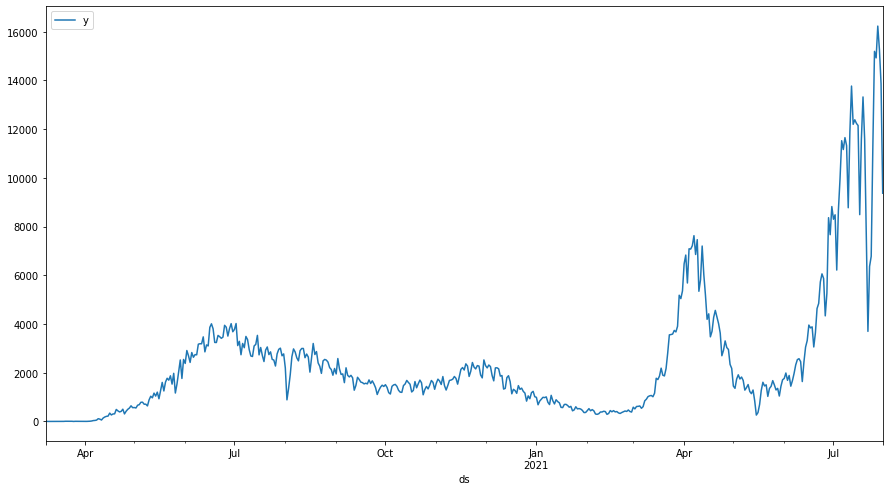

In [ ]:
# plot the time series
from matplotlib import pyplot
df_detected.plot('ds', figsize=(15,8))

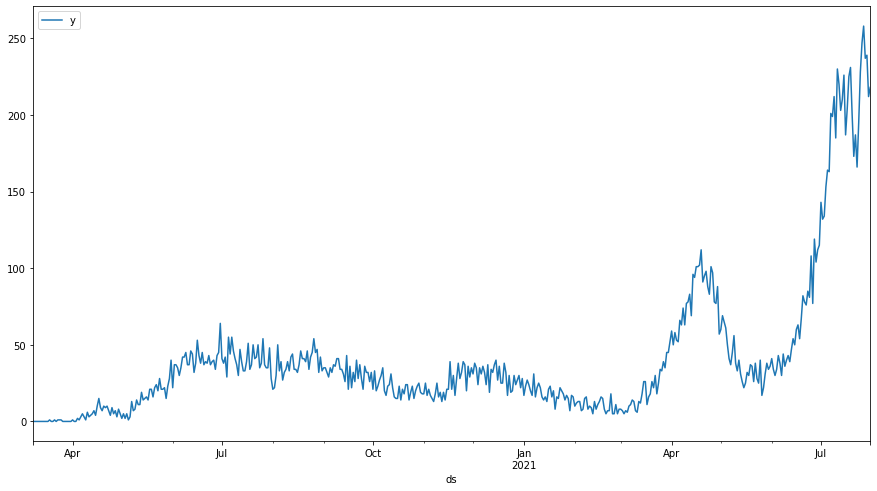

In [ ]:
df_death.plot('ds', figsize=(15,8))

In [ ]:
# df_recovery=df_recovery.fillna(-1)
# df_recovery.y=df_recovery.y.astype(np.int64)
# x=df_recovery.mean()
# x.round()

In [ ]:
df_recovery.dtypes

ds    datetime64[ns]
y             object
dtype: object

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


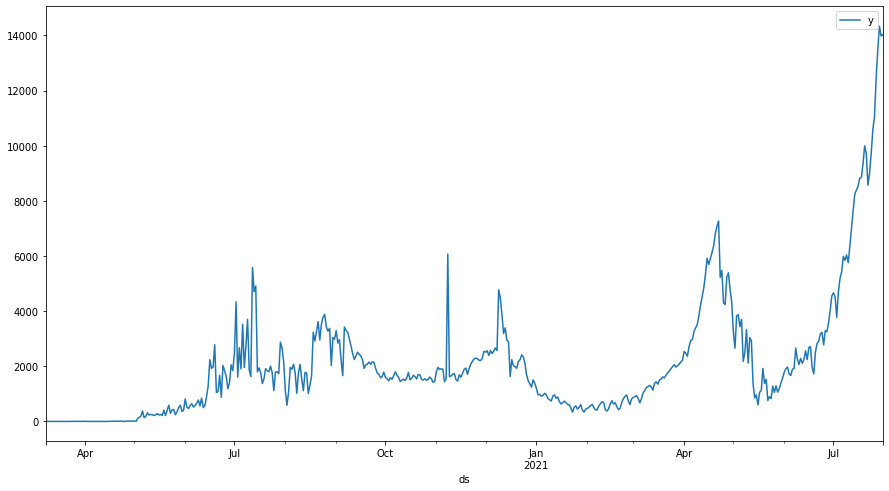

In [ ]:
df_recovery.y=df_recovery.y.astype(np.int64)
df_recovery.plot('ds', figsize=(15,8))

In [ ]:
from fbprophet import Prophet
# define the model
m_detected = Prophet()
m_death = Prophet()
m_recovery = Prophet()


# fit the model
m_detected.fit(df_detected)
m_death.fit(df_death)
m_recovery.fit(df_recovery)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#cross validation and accuracy measurement

In [ ]:
from fbprophet.diagnostics import cross_validation
#death_p = cross_validation(m_death, initial='180 days', period='25 days', horizon = '50 days')
death_p = cross_validation(m_death, initial='358 days', period='20 days', horizon = '40 days')
death_p

INFO:fbprophet:Making 6 forecasts with cutoffs between 2021-03-13 00:00:00 and 2021-06-21 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-03-14,10.622336,0.904889,19.230671,18,2021-03-13
1,2021-03-15,10.801764,1.422685,20.603708,26,2021-03-13
2,2021-03-16,11.587339,2.109399,21.276354,26,2021-03-13
3,2021-03-17,9.788952,0.694733,19.580385,11,2021-03-13
4,2021-03-18,10.029285,0.089850,19.941510,16,2021-03-13
...,...,...,...,...,...,...
235,2021-07-27,66.347302,47.480198,84.017666,258,2021-06-21
236,2021-07-28,65.203504,46.290353,85.265129,237,2021-06-21
237,2021-07-29,66.149007,48.230862,84.955808,239,2021-06-21
238,2021-07-30,62.767996,42.786268,82.426453,212,2021-06-21


In [ ]:
from fbprophet.diagnostics import performance_metrics
forecast_death_p = performance_metrics(death_p)
forecast_death_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,4 days,1141.762423,33.789975,30.439301,0.710786,0.550507,0.208333
1,5 days,1128.533572,33.593654,29.927408,0.698854,0.522331,0.250000
2,6 days,1322.406653,36.364910,31.734090,0.703098,0.526318,0.250000
3,7 days,1347.984478,36.714908,32.043815,0.652977,0.501969,0.250000
4,8 days,1343.975172,36.660267,31.659172,0.637305,0.572060,0.208333


In [ ]:
from statistics import mean
mean(forecast_death_p.mse)

5042.3854961292645

In [ ]:
mean(forecast_death_p.rmse)

68.08345012642259

In [ ]:
mean(forecast_death_p.mae)

57.65287183618522

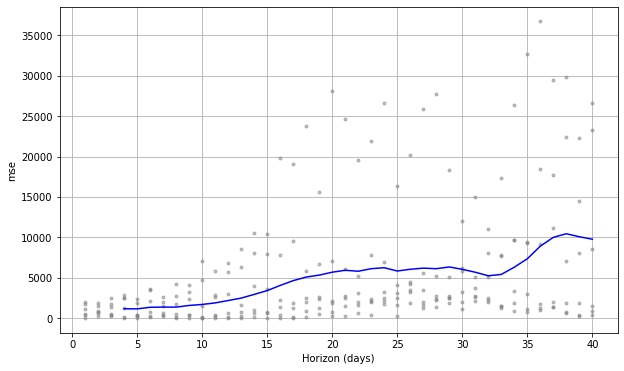

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(death_p, metric='mse')

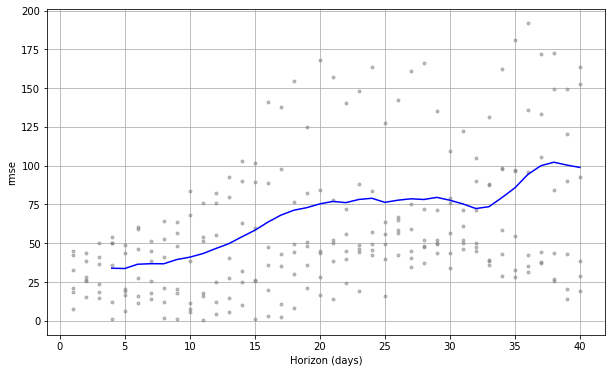

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(death_p, metric='rmse')

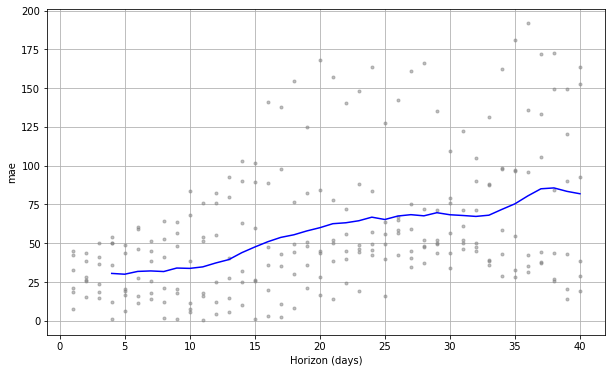

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(death_p, metric='mae')

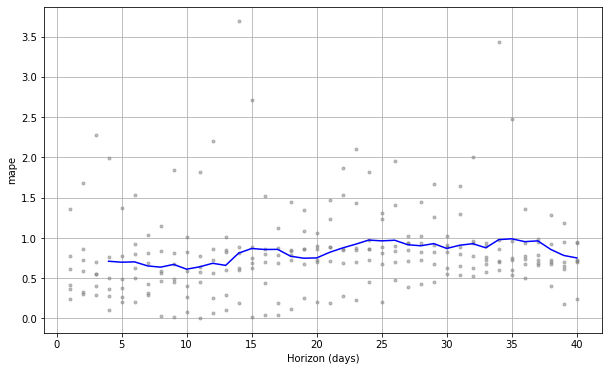

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(death_p, metric='mape')

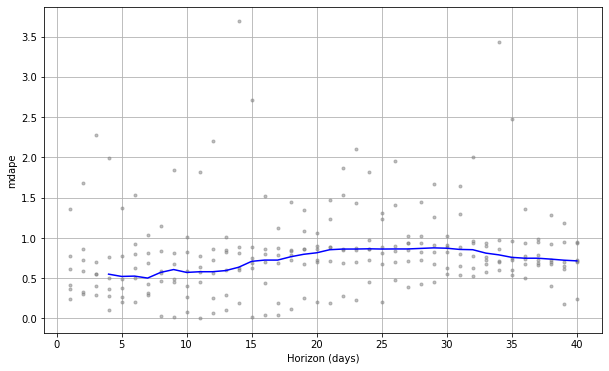

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(death_p, metric='mdape')

In [ ]:
detected_p = cross_validation(m_detected, initial='358 days', period='20 days', horizon = '40 days')
detected_p

INFO:fbprophet:Making 6 forecasts with cutoffs between 2021-03-13 00:00:00 and 2021-06-21 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-03-14,172.638745,-394.386942,741.859081,1159,2021-03-13
1,2021-03-15,374.850060,-201.220906,964.573273,1773,2021-03-13
2,2021-03-16,373.497683,-200.069915,976.813980,1719,2021-03-13
3,2021-03-17,411.541022,-176.347328,1032.585234,1865,2021-03-13
4,2021-03-18,382.331286,-242.248691,1030.434357,2187,2021-03-13
...,...,...,...,...,...,...
235,2021-07-27,3356.561547,1909.084266,4872.903363,14925,2021-06-21
236,2021-07-28,3410.860956,1952.574347,4877.844480,16230,2021-06-21
237,2021-07-29,3376.381366,1899.878035,4732.921925,15271,2021-06-21
238,2021-07-30,3336.387627,1777.468188,4830.255977,13862,2021-06-21


In [ ]:
forecast_detected_p = performance_metrics(detected_p)
forecast_detected_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,4 days,7.562250e+06,2749.954584,2376.097562,1.633087,0.695392,0.166667
1,5 days,8.514686e+06,2917.993526,2531.234923,1.761022,0.704694,0.166667
2,6 days,8.202295e+06,2863.964869,2494.691089,1.694649,0.692528,0.166667
3,7 days,9.127492e+06,3021.174026,2608.919064,1.256588,0.705591,0.166667
4,8 days,9.176128e+06,3029.212467,2632.392948,0.974845,0.707959,0.166667


In [ ]:
mean(forecast_detected_p.mse)

20910024.98033333

In [ ]:
mean(forecast_detected_p.rmse)

4450.320284958812

In [ ]:
mean(forecast_detected_p.mae)

3760.2033893897515

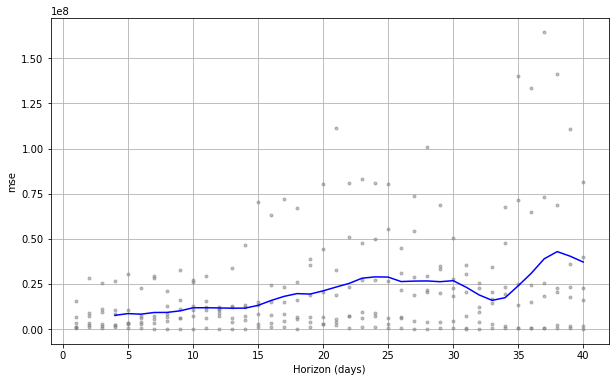

In [ ]:
#from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(detected_p, metric='mse')

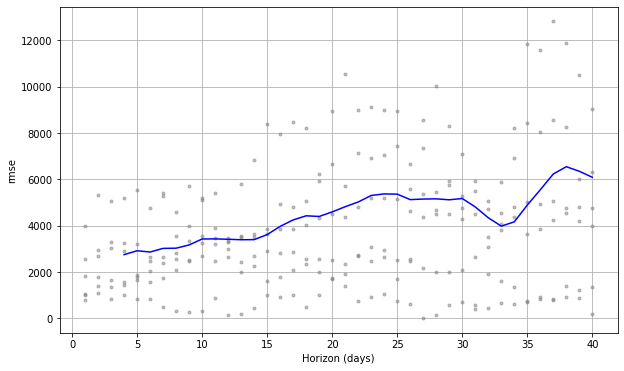

In [ ]:
fig = plot_cross_validation_metric(detected_p, metric='rmse')

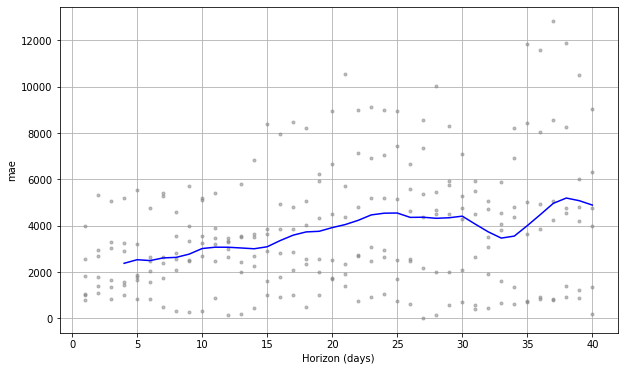

In [ ]:
fig = plot_cross_validation_metric(detected_p, metric='mae')

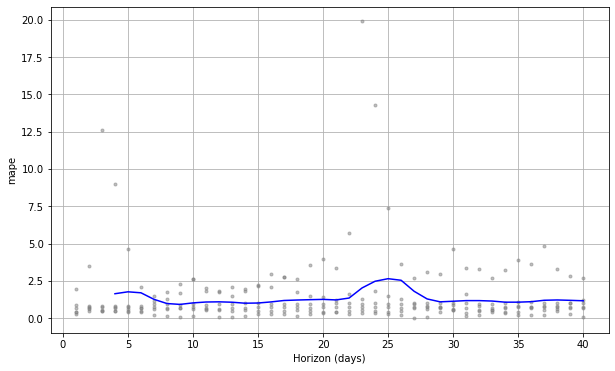

In [ ]:
fig = plot_cross_validation_metric(detected_p, metric='mape')

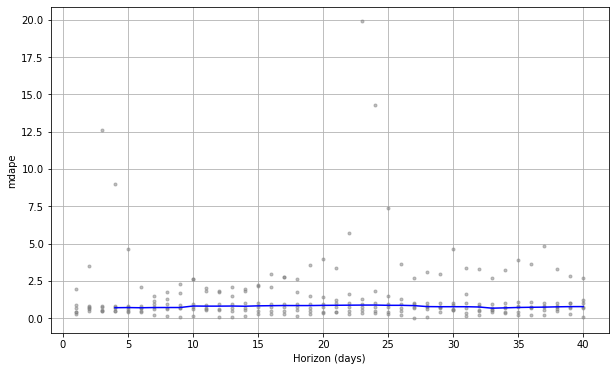

In [ ]:
fig = plot_cross_validation_metric(detected_p, metric='mdape')

In [ ]:
recovery_p = cross_validation(m_recovery, initial='358 days', period='20 days', horizon = '40 days')
recovery_p

INFO:fbprophet:Making 6 forecasts with cutoffs between 2021-03-13 00:00:00 and 2021-06-21 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-03-14,598.547028,-324.724857,1430.159166,1385,2021-03-13
1,2021-03-15,604.164331,-316.013951,1449.767800,1432,2021-03-13
2,2021-03-16,605.424853,-295.618826,1521.157601,1352,2021-03-13
3,2021-03-17,602.525128,-325.546957,1516.904368,1510,2021-03-13
4,2021-03-18,662.300631,-280.448892,1563.944906,1534,2021-03-13
...,...,...,...,...,...,...
235,2021-07-27,2899.426170,1621.348135,4343.931511,12439,2021-06-21
236,2021-07-28,2934.369181,1532.541712,4243.212611,13470,2021-06-21
237,2021-07-29,2978.761441,1589.834623,4380.629763,14336,2021-06-21
238,2021-07-30,2741.675385,1329.606103,4114.606054,13975,2021-06-21


In [ ]:
forecast_recovery_p = performance_metrics(recovery_p)
forecast_recovery_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,4 days,2.969704e+06,1723.282961,1440.002110,0.968192,0.542677,0.583333
1,5 days,3.127052e+06,1768.347189,1496.150972,1.008927,0.542677,0.583333
2,6 days,3.155315e+06,1776.320753,1518.011938,0.978365,0.542677,0.541667
3,7 days,3.245919e+06,1801.643328,1548.354672,0.908200,0.524766,0.458333
4,8 days,3.465430e+06,1861.566412,1631.202171,0.769534,0.504182,0.375000


In [ ]:
mean(forecast_recovery_p.mse)

11627030.414338777

In [ ]:
mean(forecast_recovery_p.rmse)

3240.4843492826167

In [ ]:
mean(forecast_recovery_p.mae)

2760.9646390978537

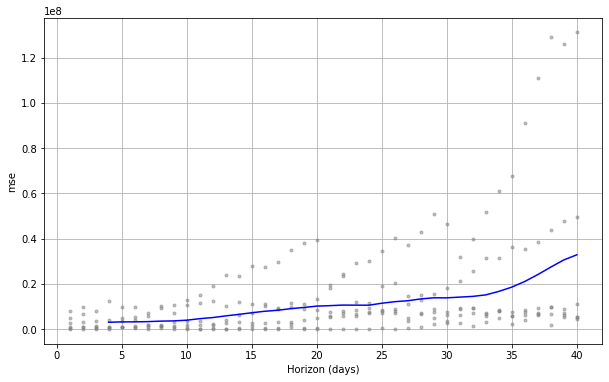

In [ ]:
fig = plot_cross_validation_metric(recovery_p, metric='mse')

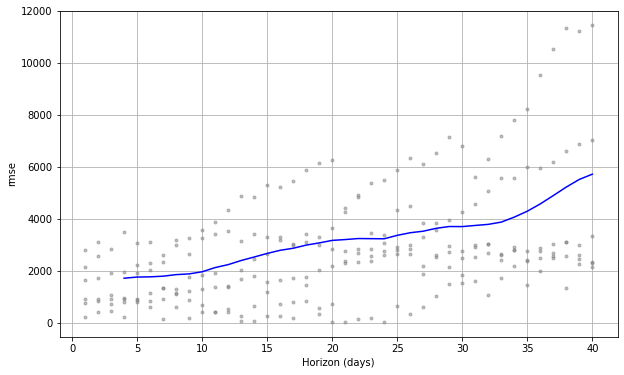

In [ ]:
fig = plot_cross_validation_metric(recovery_p, metric='rmse')

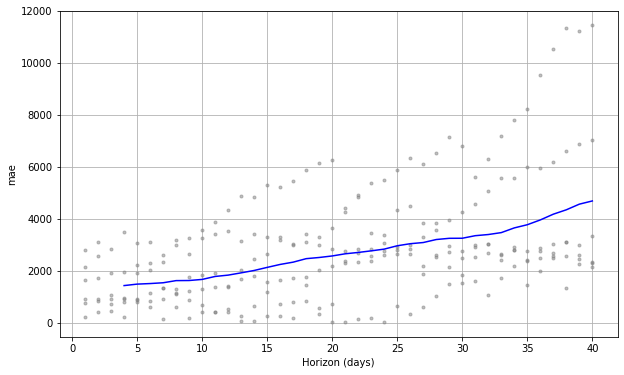

In [ ]:
fig = plot_cross_validation_metric(recovery_p, metric='mae')

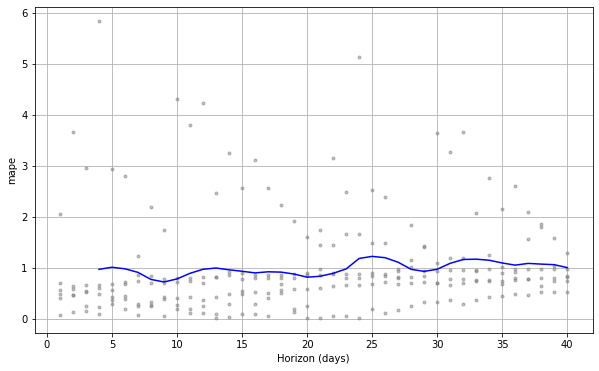

In [ ]:
fig = plot_cross_validation_metric(recovery_p, metric='mape')

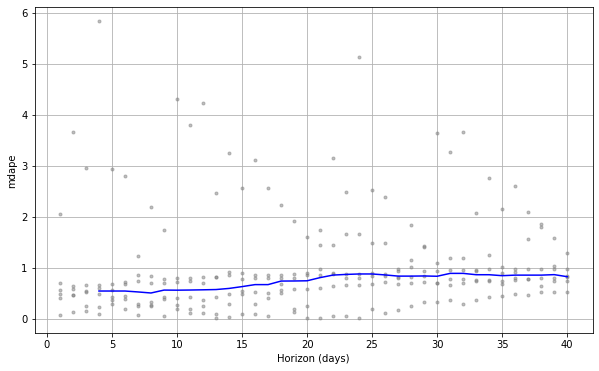

In [ ]:
fig = plot_cross_validation_metric(recovery_p, metric='mdape')

In [ ]:
#predictions for future dates

In [ ]:
future_death= m_death.make_future_dataframe(periods=150)
future_detected= m_detected.make_future_dataframe(periods=150)
future_recovery= m_recovery.make_future_dataframe(periods=150)
#future_detected= m_detected.make_future_dataframe(periods=365)
#future_recovery= m_recovery.make_future_dataframe(periods=365)
future_death

,ds
0,2020-03-08
1,2020-03-09
2,2020-03-10
3,2020-03-11
4,2020-03-12
...,...
656,2021-12-24
657,2021-12-25
658,2021-12-26
659,2021-12-27


In [ ]:
forecast_death = m_death.predict(future_death)
forecast_death[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-03-08,2.100302,-28.260073,32.587218
1,2020-03-09,2.688804,-29.288785,36.155249
2,2020-03-10,2.457856,-30.283336,34.492807
3,2020-03-11,1.375224,-29.988607,33.776395
4,2020-03-12,2.835618,-30.597868,33.393183
...,...,...,...,...
656,2021-12-24,324.086650,282.697672,364.662142
657,2021-12-25,326.997449,287.817063,366.647547
658,2021-12-26,331.091319,290.383178,371.614458
659,2021-12-27,332.523487,291.060387,372.692980


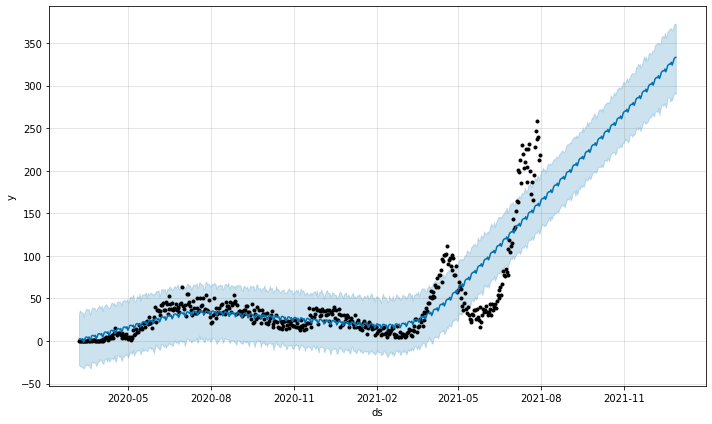

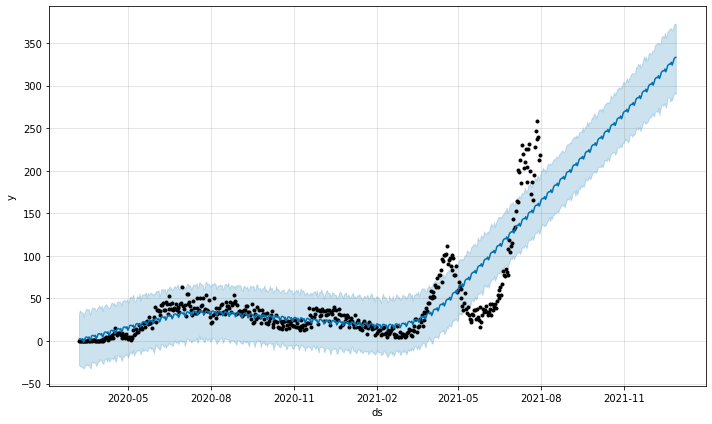

In [ ]:
### plot the predicted projection
m_death.plot(forecast_death)

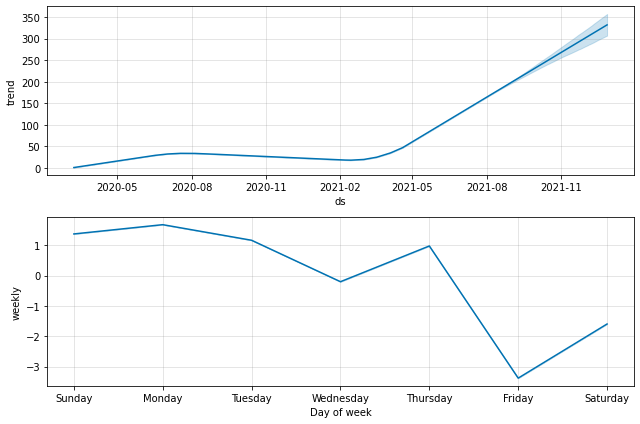

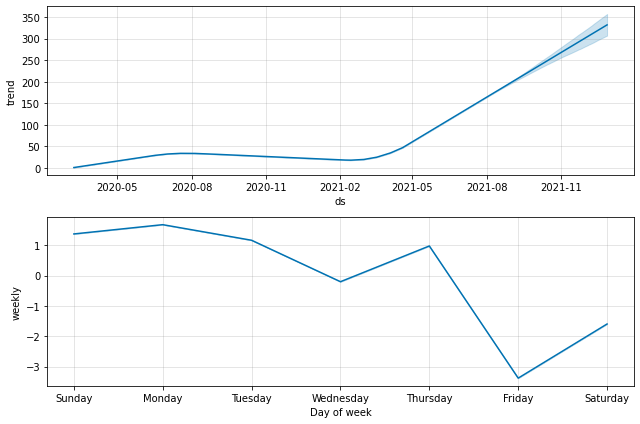

In [ ]:
#### Visualize Each Components[Trends,yearly]
m_death.plot_components(forecast_death)

In [ ]:
forecast_detected = m_detected.predict(future_detected)
forecast_detected[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-03-08,-22.886724,-2232.194076,2355.479482
1,2020-03-09,407.986571,-1788.049251,2514.341391
2,2020-03-10,396.637930,-1789.004756,2786.586673
3,2020-03-11,433.970804,-1841.192023,2831.696823
4,2020-03-12,336.385644,-1916.865719,2316.014274
...,...,...,...,...
656,2021-12-24,16274.645706,13427.579873,18758.428799
657,2021-12-25,15849.033515,13269.253708,18443.702091
658,2021-12-26,16142.236232,13755.501575,18803.779728
659,2021-12-27,16607.710726,13967.944206,19148.617568


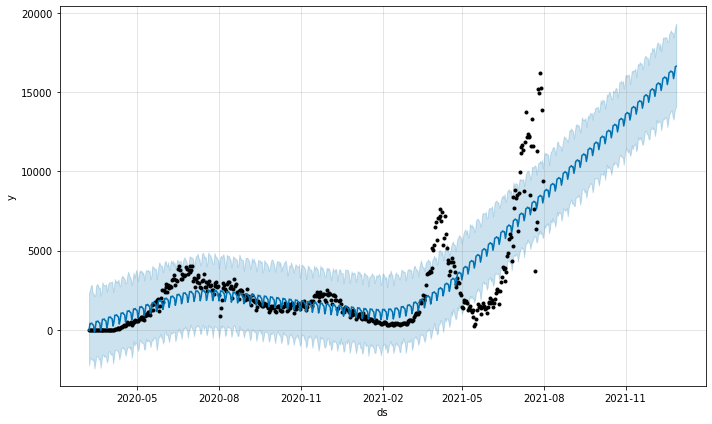

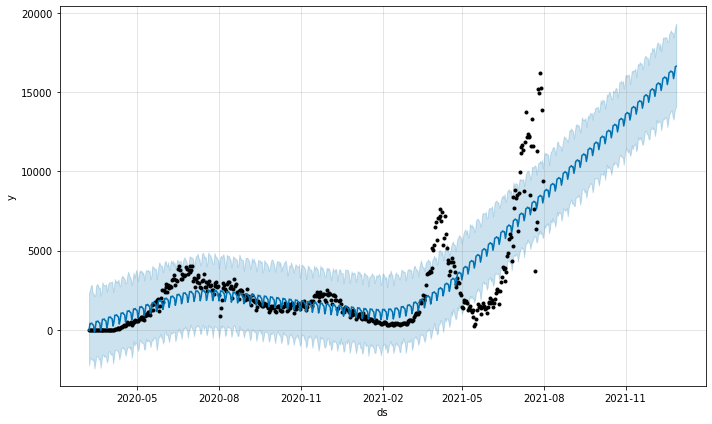

In [ ]:
m_detected.plot(forecast_detected)

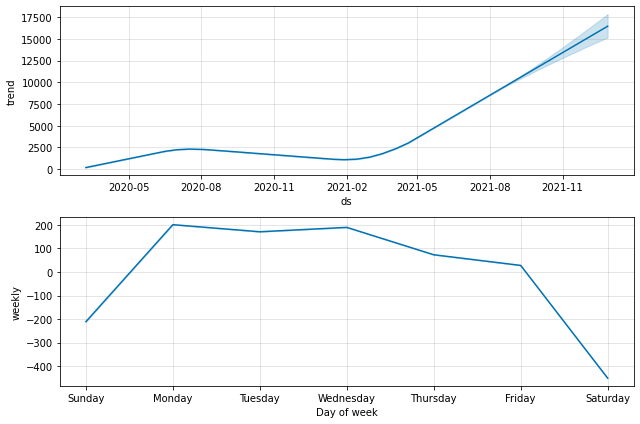

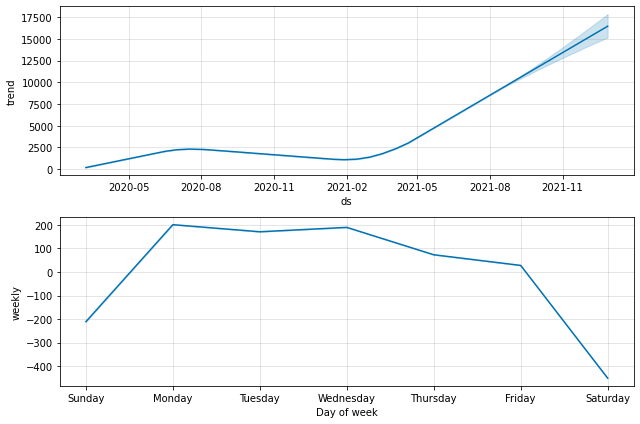

In [ ]:
m_detected.plot_components(forecast_detected)

In [ ]:
forecast_recovery = m_recovery.predict(future_recovery)
forecast_recovery[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-03-08,-417.524738,-2218.331536,1660.006196
1,2020-03-09,-337.337148,-2141.200775,1544.846285
2,2020-03-10,-220.028963,-2056.111806,1797.941271
3,2020-03-11,-148.133731,-2175.463191,1691.277611
4,2020-03-12,-105.760427,-2028.356579,1822.283988
...,...,...,...,...
656,2021-12-24,12073.482515,9869.437910,14290.258148
657,2021-12-25,11945.403369,9837.565406,14232.099900
658,2021-12-26,12137.833700,10083.118507,14391.246493
659,2021-12-27,12239.343161,10164.743159,14386.356929


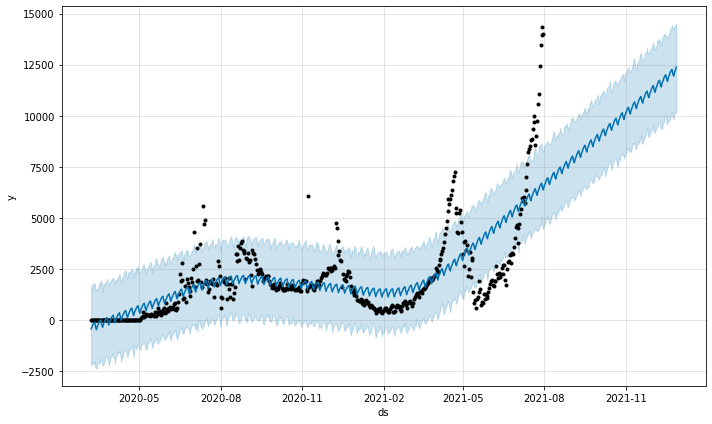

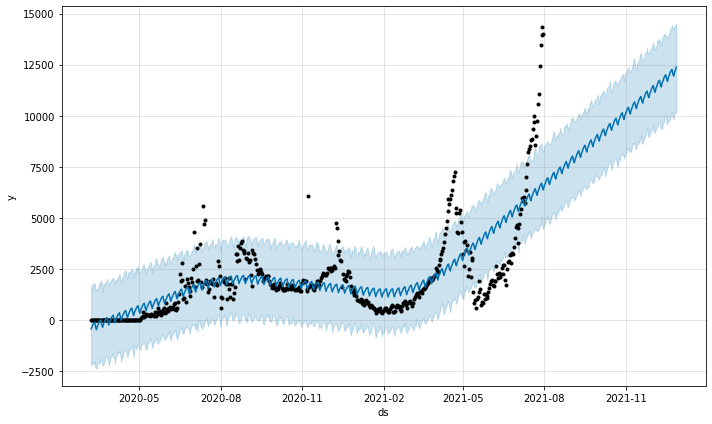

In [ ]:
m_recovery.plot(forecast_recovery)

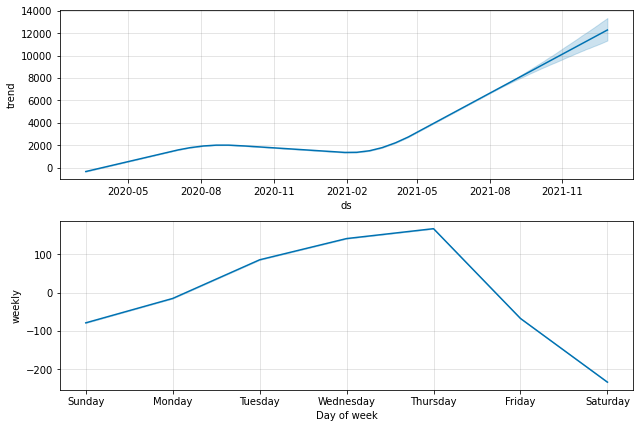

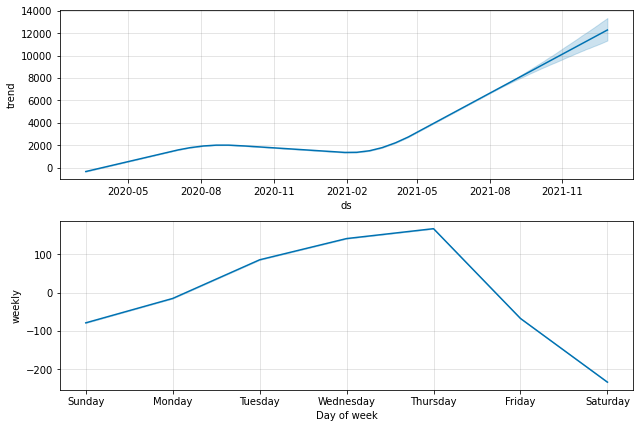

In [ ]:
m_recovery.plot_components(forecast_recovery)